In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('Datasets/Housing.csv')

In [5]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


In [15]:
new_house_features = {
    'area': 8000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'yes',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 2,
    'prefarea': 'yes',
    'furnishingstatus': 'semi-furnished'  
}

In [16]:
new_house_data = pd.DataFrame([new_house_features])

In [17]:
new_house_data = pd.get_dummies(new_house_data, drop_first=True)

In [26]:
predicted_price = model.predict(X)

In [23]:
print(f"The predicted price for the new house is ${predicted_price[0]:.2f}")

The predicted price for the new house is $8133305.31


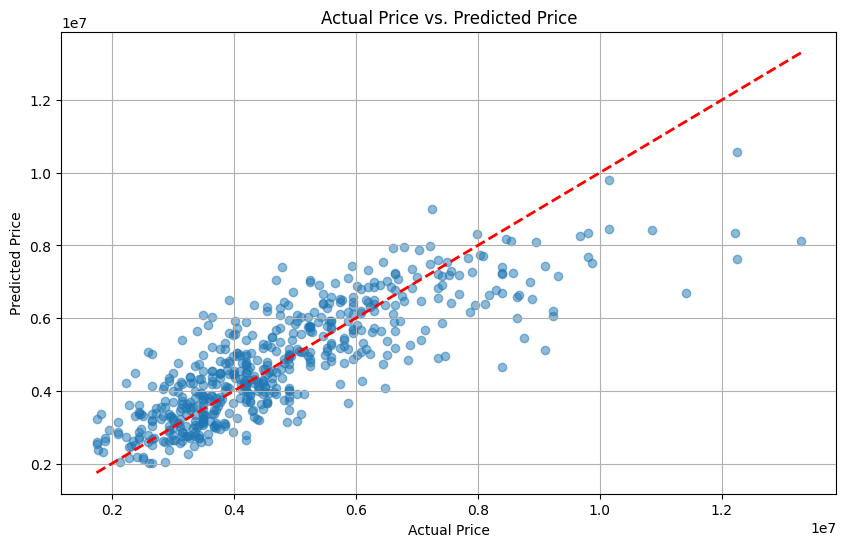

In [36]:
# Plotting the Predicted Price and Actual Price

import matplotlib.pyplot as plt

y_pred = model.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.grid(True)


plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)


plt.show()